# Выявление профилей потребления

**Описание проекта:**

Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. Я помогу этому магазину стать лучше, а клиентам — обустроить дом своей мечты. Необходимо расчитать метрики и создать гипотезы на основе полученных данных.

Передо мной данные за полтора года. Подумав о том, как сегментация может помочь в разработке более персонализированных предложений для покупателей. Я попробую сформировать сегменты на основе того, что покупают пользователи. Для этого я проанализирую их покупки и сегментирую товары на основе принадлежности к той или иной товарной категории.

С помощью RFM-анализа разделю покупателей на кластеры.

Затем сформулирую 2 статистические гипотезы о статистически значимой разнице между выборками и проверю их. Если хотя бы одна проверка покажет разницу, следовательно кластеризация проведена успешно. Если две проверки не обнаружат разницы между двумя одинаковыми кластерами - необходимо пересмотреть разбивку на кластеры.

По итогам исследования необходимо составить подробные рекомендации заказчику по кластерам покупателей и создать презентацию.

**Цель исследования:**
1. Сегментировать покупателей на основе истории покупок;
2. Определить какая сегментация поможет в разработке более персонализированных предложений для покупателей;
3. Презентовать полученные результаты.

**План исследования:**
* **Предобработка данных:**
    * Исследовать пропуски;
    * Исследовать соответствие типов данных;
    * Исследовать дубликаты;
    * Проверить корректность названия столбцов;
    * Переименовать столбцы;
    * Удалить дубликаты;
    * Привести типы данных;
    * Заполнить пропуски;
    * Категоризировать товары;
* **Исследовательский анализ данных:**
* **Сегментация покупателей:**    
    * Провести RFM-анализ;
* **Проверка гипотез**
* **Исследовать сегменты на популярные категории и их сезонность**
    * Определить клиентам какого сегмента, когда и какие категории товара рассылать в рекламных предложениях.
* **Выводы и рекомендации.**

**Описание данных**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока
все ещё тут».

Столбцы в `/datasets/ecom_dataset_upd.csv`:

* `date` — дата заказа;
* `customer_id` — идентификатор покупателя;
* `order_id` — идентификатор заказа;
* `product` — наименование товара;
* `quantity` — количество товара в заказе;
* `price` — цена товара.

## Загрузка данных и подготовка к анализу

In [1]:
# Импорт библиотек
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import timedelta
import plotly.express as px
from scipy import stats as st

In [2]:
# Открытие данных и разделение колонок, столбцов
data = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [3]:
# Вывод первых строк набора данных методом head()
data.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


### Подготовка данных

In [4]:
# Вывод информации обо всей таблице методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Все столбцы, кроме `date` имеют корректные типы данных.

In [5]:
# Привидение столбца date к формату datetime64[ns]
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

### Проверка пропусков

In [6]:
# Поиск пропусков и явных дубликатов
print('Количество пропущенных значений в таблице по столбцам:')
print(data.isna().sum())
print('Количество явных дубликатов во всех столбцах:')
print(data.duplicated().sum())

Количество пропущенных значений в таблице по столбцам:
date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64
Количество явных дубликатов во всех столбцах:
0


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Пропусков в данных не обнаружено, что говорит о полноте данных.

### Проверка дубликатов

In [7]:
# Поиск дубликатов без учета даты
print('Количество явных дубликатов в таблице без столбца с датой:')
print(data.duplicated(subset=['customer_id','order_id', 'product', 'quantity', 'price']).sum())

Количество явных дубликатов в таблице без столбца с датой:
1864


In [8]:
# Вывод дубликатов для их изучения
data[data.duplicated(subset=['customer_id','order_id', 'product', 'quantity', 'price'])].head(15)

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
126,2018-10-07 17:00:00,ce0e0c29-8c8b-4714-84bd-80957224d4cf,68557,Сумка-тележка хозяйственная Gimi Market синяя,1,1874.0
147,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 15,0 л пищевой овальный ""Ekk...",1,209.0
148,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 18,0 л пищевой (Иж), 1404047",1,194.0
149,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 20,0 л пищевой (Минеральные ...",1,277.0
150,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 24,0 л пищевой круглый (Иж),...",1,239.0


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Судя по полученным дубликатам, в датасет попали все заказы, в том числе и отмененные. Поэтому, чтобы от них избавиться, необходимо удалить дубликаты и оставить последние значения.

In [9]:
# Расчёт доли явных дубликатов
print('Доля явных дубликатов:')
print(round(data.duplicated(subset=['customer_id','order_id', 'product', 'quantity', 'price']).
            sum()/len(data)*100, 1), '%')

Доля явных дубликатов:
24.9 %


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Доля удалённых дубликатов составит четверть всех данных - 24.9%.

In [10]:
# Удаление дубликатов с аргументом keep = 'last'
data = data.drop_duplicates(subset=['customer_id','order_id', 'product', 'quantity', 'price'], keep='last')

# Проверка дубликатов после обработки
print('Количество явных дубликатов в таблице без столбца с датой:')
print(data.duplicated(subset=['customer_id','order_id', 'product', 'quantity', 'price']).sum())

Количество явных дубликатов в таблице без столбца с датой:
0


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

В результате поиска и изучения дубликатов была удалена четверть данных-дубликатов.

In [11]:
# проверка неявных дубликатов
data[data.duplicated(subset=['customer_id', 'order_id', 'product'])]

,date,customer_id,order_id,product,quantity,price
1232,2018-12-17 10:00:00,bbb32131-2d92-4c1e-aa28-41723f7bc26c,69282,Кружка прозрачная 250 мл H8437 Luminarc Франция,12,44.0
1535,2019-01-17 17:00:00,595c636d-2625-494f-8c98-b342bd4fbb9f,69861,Алоэ Вера d-12 см h-25 см,1,239.0
1692,2019-02-04 16:00:00,eec973c9-6ae9-4c1b-b1c7-a2718fde2f84,70031,Муляж Красное яблоко мини полиуретан d-6 см,1,59.0
2205,2019-03-06 11:00:00,036edc2c-d0ad-4c71-99f6-226db1b883f4,70463,Салатник Luminarc ПОЭМА АНИС 12 см J1349,1,239.0
2347,2019-03-15 13:00:00,161ec5a3-e6df-4a8c-98ad-089aeac5bcc3,70742,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,10,172.0
2571,2019-03-31 09:00:00,977bba90-df53-4513-b5db-30d6ea1fbca1,70769,Искусственный цветок Подснежник пластиковый белый,25,32.0
3395,2019-05-03 20:00:00,b17d36a6-13b0-4896-815f-45ee6adfd23d,71341,Калла крупноцветковая малиновая,1,374.0
3888,2019-05-17 14:00:00,2c2f1c82-d5f8-462a-b3ea-8ab375a8fa0d,71413,Карниз для ванной комнаты Виолет раздвижной 28...,2,224.0
4660,2019-06-05 20:00:00,ae6940d3-a1c7-4997-8853-a5b8afc60d51,71148,Гладильная доска НИКА Гранд 122х42 см НГ,2,1799.0
5533,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0


In [12]:
# Удаление дубликатов с аргументом keep = 'last'
data = data.drop_duplicates(subset=['customer_id','order_id', 'product'], keep='last')

In [13]:
# Проверка наличия заказов, совершенных более чем одним покупателем
check_list = data.groupby('order_id')['customer_id'].nunique()
check_list = check_list[check_list>1]
print('Количество заказов, совершенных более чем одним покупателем: ', len(check_list))

Количество заказов, совершенных более чем одним покупателем:  29


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Так как определить, какая дата заказа верная и какой из покупателей верный, удаляем все эти заказы из датасета:

In [14]:
# Удаление заказов с id из check_list
data = data.query('order_id not in @check_list.index').reset_index(drop=True)

In [15]:
# Повторная проверка наличия заказов, совершенных более чем одним покупателем
check_list = data.groupby('order_id')['customer_id'].nunique()
check_list = check_list[check_list>1]
print('Количество заказов, совершенных более чем одним покупателем: ', len(check_list))

Количество заказов, совершенных более чем одним покупателем:  0


### Дополнение исходного датасета

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Названия столбцов имеют корректный вид и понятные обозначения, но для удобства дальнейшей обработки данных, добавлю столбцы с месяцем, днём недели заказа и суммой покупки:

In [16]:
# Добавление столбца с месяцем заказа
data['month'] = data['date'].astype('datetime64[M]').dt.date

# Добавление столбца с днём недели заказа
data['weekday_order'] = data['date'].dt.weekday

# Добавление столбца с суммой покупки
data['price_amount'] = data['price'] * data['quantity']

# Проверка результата
data.head(5)

,date,customer_id,order_id,product,quantity,price,month,weekday_order,price_amount
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,0,112.0


### Категоризация товаров

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

С помощью функции и словаря ключевых слов, добавлю категории всем товарам из датасета, разбив их на 8 типов.

In [17]:
#Объявление функции
"""
Функция принимает 1 аргумент из датафрейма (наименование товара) и 
возвращает название категории в зависимости от ключевых слов. Всего 8 категорий.
В случае если нет совпадений по ключевым словам из словаря - возвращается None(отсутствие категории)
"""
def get_category(input_str):
    keyword_dict = {'d-5': 'Цветы, растения', 'd-7': 'Цветы, растения', 'd-9': 'Цветы, растения', 
       'd-11': 'Цветы, растения','d-10': 'Цветы, растения', 'd-12': 'Цветы, растения',
       'd-13': 'Цветы, растения', 'd-15': 'Цветы, растения', 'd-17': 'Цветы, растения', 
       'd-20': 'Цветы, растения', 'd-21': 'Цветы, растения', 'зверобой': 'Цветы, растения',
       'd-23': 'Цветы, растения', 'примула': 'Цветы, растения', 'растение': 'Цветы, растения', 
       'пеларгония': 'Цветы, растения', 'рассада': 'Цветы, растения', 'кашпо': 'Цветы, растения',
       'роза': 'Цветы, растения', 'г': 'Цветы, растения', 'петуния': 'Цветы, растения',
       'бакопа': 'Цветы, растения', 'калибрахоа': 'Цветы, растения', 'томата': 'Цветы, растения',
       'дыня': 'Цветы, растения', 'фуксия': 'Цветы, растения', 'шт': 'Цветы, растения',
       'штук': 'Цветы, растения', 'колокольчик': 'Цветы, растения', 'папоротник': 'Цветы, растения',
       'клубника': 'Цветы, растения', 'вербена': 'Цветы, растения', 'ромашка': 'Цветы, растения',
       'камнеломка': 'Цветы, растения', 'фал': 'Цветы, растения', 'астра': 'Цветы, растения',
       'котовник': 'Цветы, растения', 'овсянница': 'Цветы, растения', 'вербейник': 'Цветы, растения',
       'калла': 'Цветы, растения', 'алиссум': 'Цветы, растения', 'цикламен': 'Цветы, растения',
       'эхинацея': 'Цветы, растения', 'пиретрум': 'Цветы, растения', 'ясколка': 'Цветы, растения',
       'платикодон': 'Цветы, растения', 'вероника': 'Цветы, растения', 'лапчатка': 'Цветы, растения',
       'кореопсис': 'Цветы, растения', 'хоста': 'Цветы, растения', 'энотера': 'Цветы, растения',
       'анемона': 'Цветы, растения', 'барвинок': 'Цветы, растения', 'бадан': 'Цветы, растения',
       'седум': 'Цветы, растения', 'лобелия': 'Цветы, растения', 'осина': 'Цветы, растения',
       'хризантема': 'Цветы, растения', 'лилейник': 'Цветы, растения', 'скиммия': 'Цветы, растения',

       'таз': 'Товары для дома', 'сумка-тележка': 'Товары для дома', 'сушилка': 'Товары для дома',
      'вешалка': 'Товары для дома', 'вешалки': 'Товары для дома', 'корзина': 'Товары для дома', 
       'подставка': 'Товары для дома', 'ящик': 'Товары для дома', 'штора': 'Товары для дома', 
        'коврик': 'Товары для дома', 'плечики': 'Товары для дома', 'комод': 'Товары для дома', 
       'этажерка': 'Товары для дома', 'кофр': 'Товары для дома', 'вешалок': 'Товары для дома',
       'держатель': 'Товары для дома', 'салфетки': 'Товары для дома', 'пресс': 'Товары для дома',
       'халат': 'Товары для дома', 'миксер': 'Товары для дома', 'карниз': 'Товары для дома',
       'стеллаж': 'Товары для дома', 'белье': 'Товары для дома', 'ковер': 'Товары для дома',
       'ковёр': 'Товары для дома', 'полки': 'Товары для дома', 'скатерть': 'Товары для дома',
       'простыня': 'Товары для дома','плед': 'Товары для дома', 'салфетка': 'Товары для дома',
       'салфетки': 'Товары для дома', 'простынь': 'Товары для дома', 'подушка': 'Товары для дома',
       'полотенце': 'Товары для дома', 'полка': 'Товары для дома', 'пуф': 'Товары для дома',
       'наволочка': 'Товары для дома', 'пододеяльник': 'Товары для дома', 'ковров': 'Товары для дома',
       'ключница': 'Товары для дома', 'полотенец': 'Товары для дома', 'светильник': 'Товары для дома',
       'покрывало': 'Товары для дома', 'ванной': 'Товары для дома', 'одеяло': 'Товары для дома',

       'муляж': 'Декор', 'искусственный': 'Декор', 'искусственная': 'Декор', 'искуственных': 'Декор',

      'порошок': 'Бытовая химия', 'чистящий': 'Бытовая химия', 'паста': 'Бытовая химия', 
       'мыло': 'Бытовая химия', 'средство': 'Бытовая химия', 'гель': 'Бытовая химия', 'антижир': 'Бытовая химия',
       'пена': 'Бытовая химия', 'концентрат': 'Бытовая химия', 'маска': 'Бытовая химия', 'белья': 'Бытовая химия',
       'ополаскиватель': 'Бытовая химия',

      'сверло': 'Строительство и ремонт', 'сверел': 'Строительство и ремонт', 
       'сварка': 'Строительство и ремонт', 'стяжка': 'Строительство и ремонт', 
       'инструмент': 'Строительство и ремонт', 'подголовник': 'Строительство и ремонт',
       'пружина': 'Строительство и ремонт', 'крепеж': 'Строительство и ремонт',
       'фиксатор-шар': 'Строительство и ремонт', 'завертка': 'Строительство и ремонт', 
       'основание': 'Строительство и ремонт', 'линейка': 'Строительство и ремонт', 
       'решетка': 'Строительство и ремонт', 'стремянки': 'Строительство и ремонт',
        'стремянка': 'Строительство и ремонт',  'петля': 'Строительство и ремонт',
        'ручка': 'Строительство и ремонт',

      'щетка': 'Инвентарь для уборки', 'швабра': 'Инвентарь для уборки', 'швабры': 'Инвентарь для уборки',
       'швабре': 'Инвентарь для уборки', 'ведро': 'Инвентарь для уборки', 'ведра': 'Инвентарь для уборки', 
       'перчатки': 'Инвентарь для уборки', 'мусора': 'Инвентарь для уборки', 'веник': 'Инвентарь для уборки', 
            'лопатка': 'Инвентарь для уборки',
       'губка': 'Инвентарь для уборки', 'насадка': 'Инвентарь для уборки', 'ёрш': 'Инвентарь для уборки',
       'совок': 'Инвентарь для уборки', 'тряпка': 'Инвентарь для уборки', 'ерш': 'Инвентарь для уборки',
       'сметка': 'Инвентарь для уборки',

      'кувшин': 'Посуда', 'чайник': 'Посуда', 'термокружка': 'Посуда', 'банка': 'Посуда', 'чайный': 'Посуда',
      'фужеров': 'Посуда', 'кружка': 'Посуда', 'стакан': 'Посуда', 'контейнер': 'Посуда', 'лоток': 'Посуда',
       'бокалов': 'Посуда', 'ковш': 'Посуда', 'миска': 'Посуда', 'термос': 'Посуда', 'емкость': 'Посуда',
       'блюдце': 'Посуда', 'сковорода': 'Посуда', 'бульонница': 'Посуда', 'кружек': 'Посуда', 
       'бидон': 'Посуда', 'хлебница': 'Посуда', 'мантоварка': 'Посуда', 'овощеварка': 'Посуда',
       'котел': 'Посуда', 'скребок': 'Посуда', 'блюдо': 'Посуда', 'скалка': 'Посуда', 'толкушка': 'Посуда',
       'посуды': 'Посуда', 'форма': 'Посуда', 'тортница': 'Посуда', 'венчик': 'Посуда', 'кастрюля': 'Посуда',
       'крышка': 'Посуда', 'орехоколка': 'Посуда', 'отделитель': 'Посуда', 'соковарка': 'Посуда',
       'терка': 'Посуда', 'соковыжималка': 'Посуда', 'половник': 'Посуда', 'салатник': 'Посуда',
       'сотейник': 'Посуда', 'доска': 'Посуда', 'выпечки': 'Посуда', 'масленка': 'Посуда',
       'салфетница': 'Посуда', 'сахарница': 'Посуда', 'просеиватель': 'Посуда', 'сито': 'Посуда',
       'столовых': 'Посуда', 'вилка': 'Посуда', 'ложка': 'Посуда', 'нож': 'Посуда', 'тарелка': 'Посуда',

      'тележка': 'Хозяйственные товары', 'сумка': 'Хозяйственные товары', 'гладильная': 'Хозяйственные товары',
      'шило': 'Хозяйственные товары', 'подрукавник': 'Хозяйственные товары', 'прищепок': 'Хозяйственные товары',
      'ролик': 'Хозяйственные товары', 'весы': 'Хозяйственные товары', 'чехол': 'Хозяйственные товары', 
       'мыльница': 'Хозяйственные товары', 'кольца': 'Хозяйственные товары', 'дозатор': 'Хозяйственные товары',
      'крючок': 'Хозяйственные товары', 'пробка': 'Хозяйственные товары', 'сиденье': 'Хозяйственные товары',
      'рыбочистка': 'Хозяйственные товары', 'корыто': 'Хозяйственные товары', 'вантуз': 'Хозяйственные товары',
      'коробка': 'Хозяйственные товары', 'ткань': 'Хозяйственные товары', 'зажигалка': 'Хозяйственные товары',
      'бак': 'Хозяйственные товары', 'окномойка': 'Хозяйственные товары', 'шнур': 'Хозяйственные товары', 
      'прищепки': 'Хозяйственные товары', 'кипятильник': 'Хозяйственные товары', 'урна': 'Хозяйственные товары',
      'мешок': 'Хозяйственные товары', 'термометр': 'Хозяйственные товары', 'пакет': 'Хозяйственные товары',
      'овощечистка': 'Хозяйственные товары', 'корзинка': 'Хозяйственные товары', 'фен': 'Хозяйственные товары'}
    for i in keyword_dict:
        if i in input_str.lower():
            return keyword_dict[i]
    return None 
# Вызов функции
data['category'] = data['product'].apply(get_category)

# Проверка работы функции
data['category'].value_counts()

Цветы, растения           3761
Товары для дома            930
Посуда                     298
Декор                      194
Хозяйственные товары       140
Строительство и ремонт      97
Инвентарь для уборки        81
Бытовая химия               21
Name: category, dtype: int64

In [18]:
# Проверка некатегоризированных товаров
print('Количество товаров без категории:', len(data[data['category'] == None]))

Количество товаров без категории: 0


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

На этапе загрузки и предобработки данных был произведён поиск пропусков в исходном датафрейме - они не обнаружились. Однако проверка без учёта дат показала наличие явных дубликатов в количестве 1864, они были удалены.
    
Также была проведена проверка типов данных и привидение к соответвующему типу столбца `date`.
    
Дополнительно были созданы столбцы с месяцем (`month`) и днём недели заказа (`weekday_order`), и сумма покупки (`price_amount`).
    
Для дальнейшего исследования все товары разделены на категории, названия которых были добавлены в датасет.

## Исследовательский анализ данных

### Изучение обработанных данных

In [19]:
# Вывод информации о датах
print('Первая дата покупки:', data['date'].min())
print('Последняя дата покупки:', data['date'].max())
print('Исследуемый период:', (data['date'].max() - data['date'].min()).days, 'дней')

Первая дата покупки: 2018-10-01 00:00:00
Последняя дата покупки: 2020-01-31 15:00:00
Исследуемый период: 487 дней


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Для анализа мне доступна история заказов с 1 октября 2018 года по 31 января 2020 года, т.е. 487 дней.

In [20]:
# Вывод числа уникальных покупателей в представленном датасете
print('Количество уникальных покупателей:', data['customer_id'].nunique())

Количество уникальных покупателей: 2413


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

В датасете хранится информация о 2413 уникальном покупателе.

In [21]:
# Вывод числа уникальных заказов в представленном датасете
print('Количество уникальных заказов:', data['order_id'].nunique())

Количество уникальных заказов: 3492


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Всего в данных хранится информация о 3492 уникальном заказе.

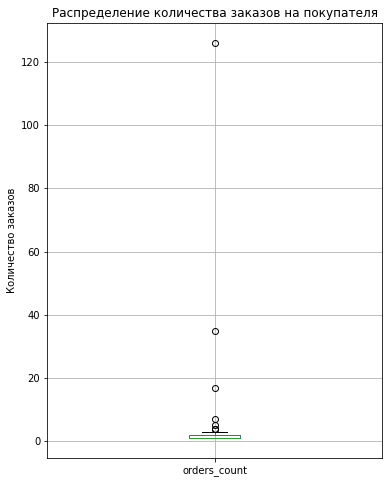

In [22]:
# Определние среднего количества заказов на покупателя
average_orders = data.groupby('customer_id').agg(orders_count = ('order_id', 'nunique'))

# Построение диаграммы размаха
plt.figure(figsize=(6, 8))
plt.title('Распределение количества заказов на покупателя')
plt.ylabel('Количество заказов')
average_orders.boxplot()
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

На диаграмме видно наличие выбросов в данных, которые не дают увидеть на графике необходимые значения. Чтобы это исправить, зададим лимит оси ординат (`Количество заказов`):

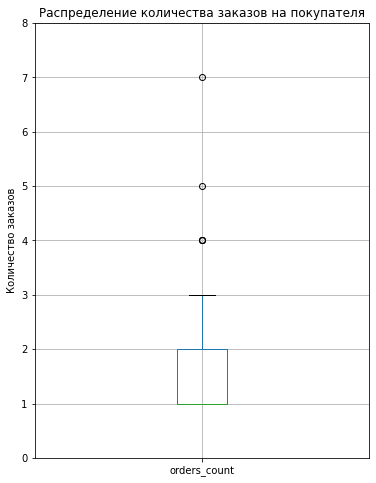

In [23]:
# Построение диаграммы размаха
plt.figure(figsize=(6, 8))
plt.title('Распределение количества заказов на покупателя')
plt.ylabel('Количество заказов')
average_orders.boxplot()
plt.ylim(0, 8)
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Так как в данных присутствуют выбросы, лучше использовать медиану вместо среднего значения, которая менее чувствительна к выбросам.
    
На диаграмме теперь четко видно, что медиана количества заказов на одного покупателя составляет 1.

### Распределение заказов по дате и времени

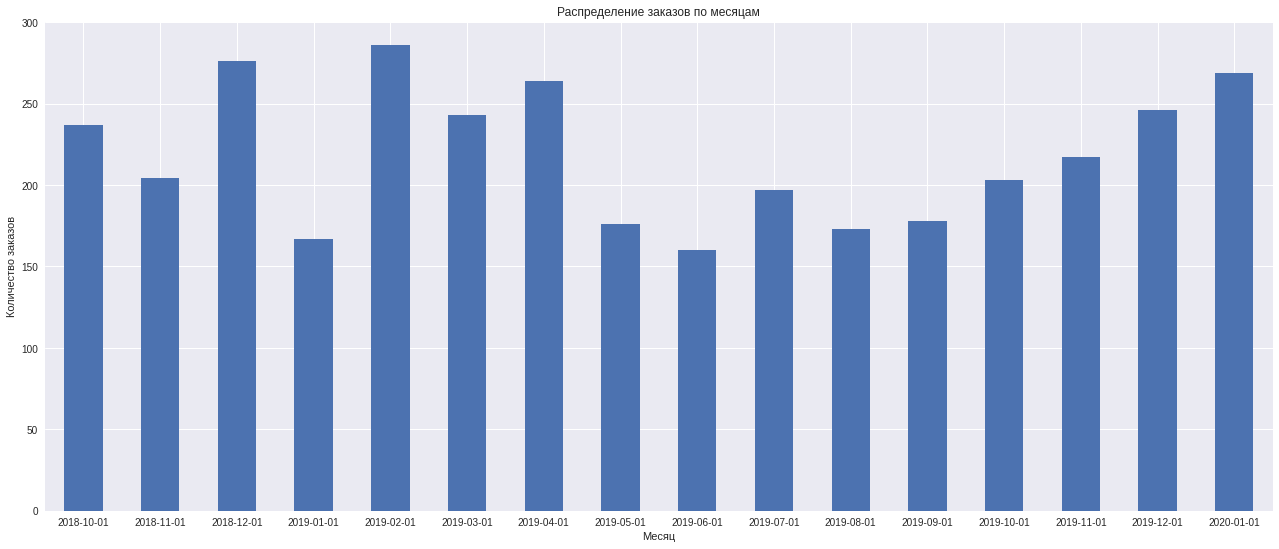

In [24]:
# Группировка данных
month_group = data.groupby('month')['order_id'].nunique()
# Построение графика
with plt.style.context('seaborn'):
    month_group.plot.bar(x='order_id', y='month', grid=True, figsize=(22,9), 
                   title = 'Распределение заказов по месяцам',
                   xlabel='Месяц', ylabel = 'Количество заказов')
    plt.xticks(rotation=0)
    plt.show() 

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

По полученному графику можно сделать следующие наблюдения:
* В январе 2019 был резкий спад;
* С августа 2019 идёт плавное увеличение количества заказов;
* Максимальное число заказов было в феврале 2019 года.

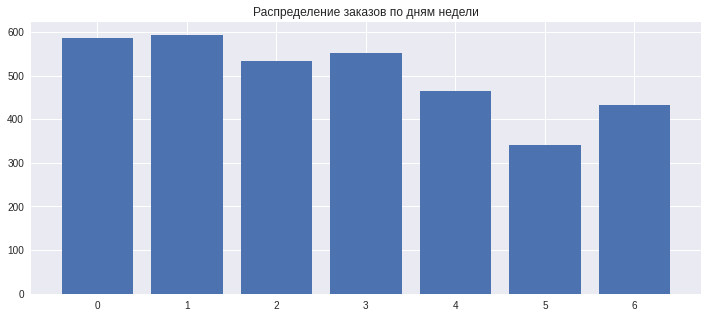

In [25]:
# Группировка данных
weekday_group = data.groupby('weekday_order').agg({'order_id': 'nunique'}).reset_index()
# Построение графика
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,5))
    plt.bar(weekday_group['weekday_order'], weekday_group['order_id'])
    plt.title('Распределение заказов по дням недели')
    plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Чаще всего покупатели оформляют заказы в начале недели.
    
Наименьшее количество заказов в субботу.

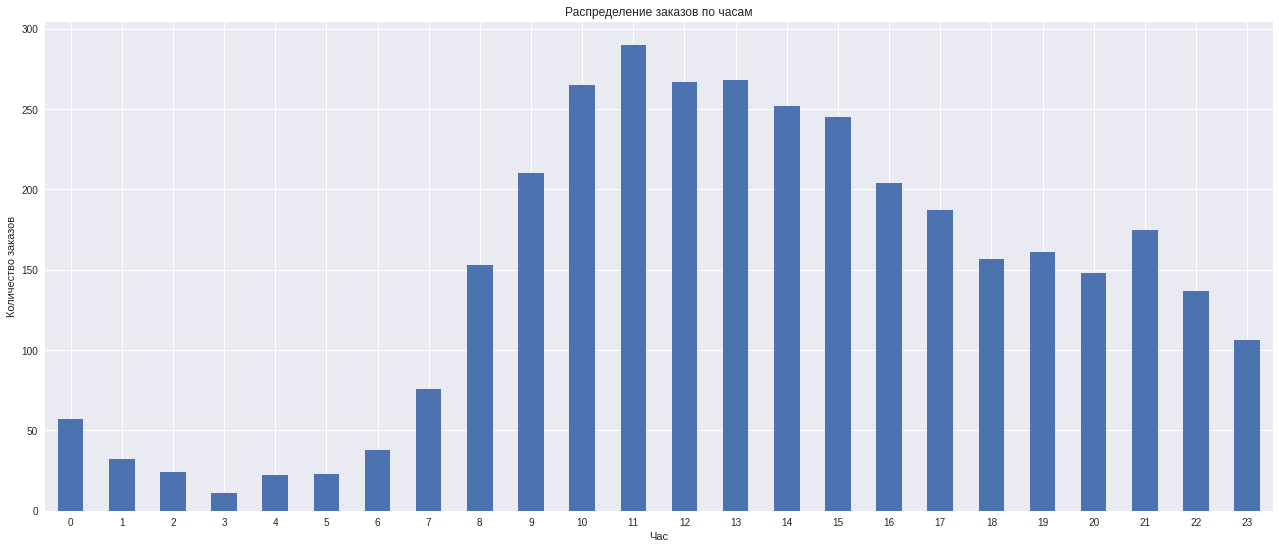

In [26]:
# Добавление столбца с часом совершения заказа
data['order_hour'] = pd.to_datetime(data['date']).dt.hour
# Группировка данных
hour_group = data.groupby('order_hour')['order_id'].nunique()
# Построение графика
with plt.style.context('seaborn'):
    hour_group.plot.bar(x='order_hour', y='order_id', grid=True, figsize=(22,9), 
                   title = 'Распределение заказов по часам',
                   xlabel='Час', ylabel = 'Количество заказов')
    plt.xticks(rotation=0)
    plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Пик покупательского спроса приходится на полуденное время и начинает резко снижаться с 16:00.
    
Ночные заказы, это скорее исключение из правила, нежели закономерность.

### Изучение категорий товаров

Общее количество уникальных позиций товаров: 2334
--------------------------------------------------
category
Цветы, растения           1454
Товары для дома            414
Посуда                     195
Хозяйственные товары        71
Декор                       69
Строительство и ремонт      61
Инвентарь для уборки        55
Бытовая химия               15
Name: product, dtype: int64


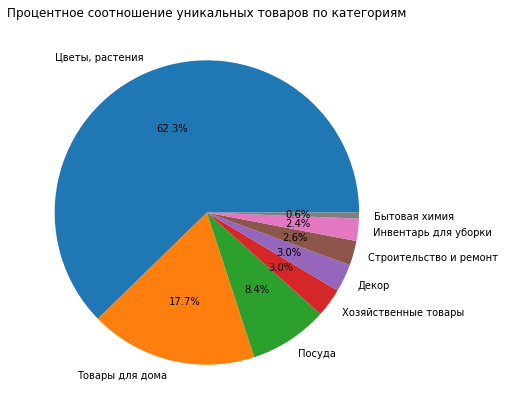

In [27]:
# Вывод общего количества уникальных позиций товаров
print('Общее количество уникальных позиций товаров:', data['product'].nunique())
print('-' * 50)
# Вывод количества уникальных товаров по категориям
print(data.groupby('category')['product'].nunique().sort_values(ascending=False))

# Вывод круговой диаграммы соотношения уникальных товаров по категориям
data.groupby('category')['product'].nunique().sort_values(ascending=False).plot(
    kind = 'pie', 
    y = 'ratio',
    autopct = '%0.1f%%', 
    figsize=(12,7),
    ylabel='',
    title = 'Процентное соотношение уникальных товаров по категориям')
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Больше всего уникальных товаров в категории `Цветы, растения` - 1456 позиций, что составляет больше половины всего ассортимента (62%).
    
Меньше всего позиция в категории `Бытовая химия` - 16 наименований, что является меньше 1%.

Сумма всех покупок: 4593179
-----------------------------------
category
Цветы, растения           1677639.0
Товары для дома           1501430.0
Хозяйственные товары       772020.0
Посуда                     244586.0
Строительство и ремонт     166909.0
Инвентарь для уборки       122470.0
Декор                       93996.0
Бытовая химия               14128.0
Name: price_amount, dtype: float64


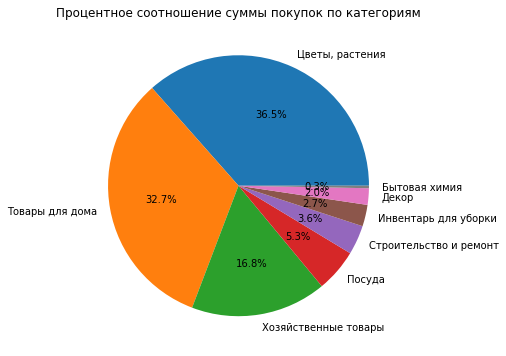

In [28]:
# Вывод суммы всех покупок
print('Сумма всех покупок:', round(data['price_amount'].sum()))
print('-' * 35)
# Вывод суммы покупок по категориям
print(round(data.groupby('category')['price_amount'].sum().sort_values(ascending=False)))

# Вывод круговой диаграммы соотношения суммы покупок по категориям
data.groupby('category')['price_amount'].sum().sort_values(ascending=False).plot(
    kind = 'pie', 
    y = 'sum',
    autopct = '%0.1f%%', 
    figsize=(10,6),
    ylabel='',
    title = 'Процентное соотношение суммы покупок по категориям')
plt.show()

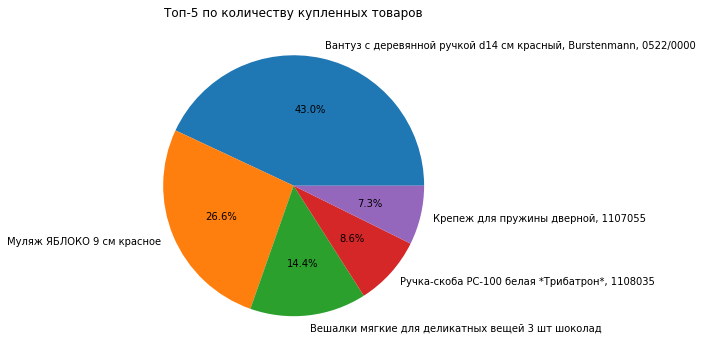

In [29]:
# Вывод круговой диаграммы топ-10 проданных товаров
data.groupby('product')['quantity'].sum().sort_values(ascending=False).head(5).plot(
    kind = 'pie', 
    y = 'sum',
    autopct = '%0.1f%%', 
    figsize=(10,6),
    ylabel='',
    title = 'Топ-5 по количеству купленных товаров')
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Исходя из полученных результатов, можно сделать следующие выводы:
* Больше всего покупатели потратили на категорию `Цветы, растения` - 1 677 639 (36.5%);
* Конкуренцию цветам и растениям составили `Товары для дома` - 1 501 430 (32.7%);
* Почётное третье место заняла категория `Хозяйственные товары` - 772 020 (16,8%);
* Остальные категории занимают достаточно небольшую часть от общей суммы покупок.
    
По проданным товарам в топ-5 находятся 4 товара из категории `Цветы, растения` (в сумме 79.2%) и 1 товар из категории `Инвентарь для уборки`(20.8%).

### Проверка данных на выбросы

In [30]:
# Изучение числовых характеристик
data[['price','price_amount', 'quantity']].describe()

,price,price_amount,quantity
count,5522.000000,5522.000000,5522.000000
mean,531.609939,831.796345,2.579500
std,975.252473,9224.411238,16.505923
min,9.000000,9.000000,1.000000
25%,90.000000,120.000000,1.000000
50%,150.000000,191.000000,1.000000
75%,524.000000,734.000000,1.000000
max,14917.000000,675000.000000,1000.000000


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Наблюдаем нетипичные значения (выбросы) во всех проверяемых столбцах, но в столбце `price` они обоснованы, так как цена товара может быть любой и её не нужно усреднять.

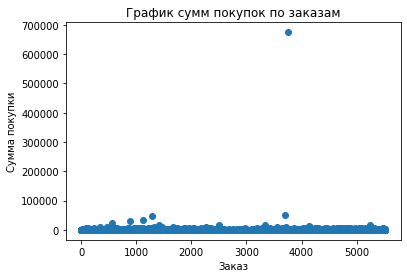

Порог нормальных значений для суммы покупки: 20288


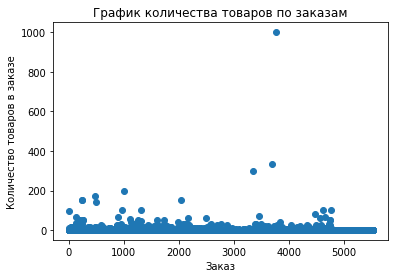

Порог нормальных значений для количества товаров в заказе: 25.0


In [31]:
# Построение точечных графиков
x_values = pd.Series(range(0,len(data['price_amount'])))
plt.scatter(x_values, data['price_amount']) 
plt.title('График сумм покупок по заказам')
plt.ylabel('Сумма покупки')
plt.xlabel('Заказ')
plt.show()
print('Порог нормальных значений для суммы покупки:', round(np.percentile(data['price_amount'], 99.9)))

x_values = pd.Series(range(0,len(data['quantity'])))
plt.scatter(x_values, data['quantity']) 
plt.title('График количества товаров по заказам')
plt.ylabel('Количество товаров в заказе')
plt.xlabel('Заказ')
plt.show()
print('Порог нормальных значений для количества товаров в заказе:', np.percentile(data['quantity'], 99))

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

По графикам можно сделать вывод, что в данных есть аномальные значения, от которых нужно избавиться, чтобы не получить искаженные результаты анализа.

In [32]:
# Исключение выбросов с помощью среза
data = data.query('price_amount < 20289 and quantity < 25').reset_index(drop=True)

In [33]:
# Вывод числа уникальных покупателей после очистки выбросов
print('Количество уникальных покупателей:', data['customer_id'].nunique())
# Вывод числа уникальных заказов после очистки выбросов
print('Количество уникальных заказов:', data['order_id'].nunique())

Количество уникальных покупателей: 2356
Количество уникальных заказов: 3426


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

В результате проверки и очистки данных от аномальных значений, в датафрейме осталась информация о 2356 уникальных покупателях и о 3426 уникальных заказах.

## RFM-анализ

### Сбор данных для RFM-анализа

In [34]:
# Началом анализа принимаю следующий день после последнего заказа в датасете
now = data['date'].max() + timedelta(days=1)
print('Момент анализа:', now)

Момент анализа: 2020-02-01 15:00:00


In [35]:
# Добавление столбца с количеством дней от последней покупки
data['days_after_last_order'] = data['date'].apply(lambda x: (now - x).days)

In [36]:
# Создание датайфрейма для RFM-анализа
rfm_df = data.groupby('customer_id', as_index=False).agg({'days_after_last_order':'min',
                                                          'order_id': 'nunique',
                                                          'price_amount':'sum'})
rfm_df.rename(columns={'days_after_last_order': 'Recency',
                       'order_id': 'Frequency',
                       'price_amount':'Monetary'},
              inplace=True)
rfm_df.head(5)

,customer_id,Recency,Frequency,Monetary
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108,1,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,350,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Для дальнейших действий необходимо обозначить шкалу сегментации, с помощью которой покупателям будут присвоены баллы по каждой из категорий:
* времени (`Recency`)
* частоте (`Frequency`)
* сумме (`Monetary`)

In [37]:
# Создание словаря с парами квантиль - значение
level=[0.33, 0.66]
quantiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(level).to_dict()
quantiles

{'Recency': {0.33: 102.0, 0.66: 295.0},
 'Frequency': {0.33: 1.0, 0.66: 2.0},
 'Monetary': {0.33: 508.0, 0.66: 1240.0}}

In [38]:
# Присвоение баллов по времени (чем меньше балл, тем давнее была покупка)
interval_range_R=[0]

for i in range(len(quantiles['Recency'])): 
    interval_range_R.append(quantiles['Recency'][level[i]])
    
interval_range_R.append(rfm_df.Recency.max())

rfm_df['R']=pd.cut(rfm_df.Recency, interval_range_R, labels=['3', '2', '1'])

In [39]:
# Присвоение баллов по частоте (чем больше балл, чем чаще покупки)
interval_range_F=[0]

for i in range(len(quantiles['Frequency'])): 
    interval_range_F.append(quantiles['Frequency'][level[i]])
    
interval_range_F.append(rfm_df.Frequency.max())

rfm_df['F']=pd.cut(rfm_df.Frequency, interval_range_F, labels=['1', '2', '3'])

In [40]:
# Присвоение баллов по потраченной сумме(чем больше сумма покупок, тем выше балл)
interval_range_M=[0]

for i in range(len(quantiles['Monetary'])): 
    interval_range_M.append(quantiles['Monetary'][level[i]])
    
interval_range_M.append(rfm_df.Monetary.max())

rfm_df['M']=pd.cut(rfm_df.Monetary, interval_range_M, labels=['1','2','3'])

In [41]:
# Объявление функции
"""
Функция принимает датафрейм и возвращает результат конкатенации строк из 3 столбцов со значениями R, F и M
"""
def create_rfm(x): 
        return str(x['R']) + str(x['F']) + str(x['M'])
# Вызов функции    
rfm_df['RFM'] = rfm_df.apply(create_rfm, axis=1)

# Вывод получившейся таблицы
rfm_df.head(5)

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM
0,000d6849-084e-4d9f-ac03-37174eaf60c4,108,1,555.0,2,1,2,212
1,001cee7f-0b29-4716-b202-0042213ab038,350,1,442.0,1,1,1,111
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,2,1,2,212
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,3,113
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,2,1,3,213


### Сегментация покупателей

In [42]:
# Создание словаря, с помощью которого будет происходить разделение покупателей на сегменты
segment_map = {
    r'11[1-3]': 'Потерянные', # покупали давно, 1 раз, на разные суммы
    r'1[2-3][1-3]': 'Бездействующие', # покупали давно, несколько раз, на разные суммы
    r'2[1-3][1-3]': 'Перспективные', # покупали не так давно, на разные суммы
    r'3[1-3][1-3]': 'Недавние', # покупали недавно, больше 1 раза, на большую сумму
    } 

In [43]:
# Присвоение сегментам названий с помощью словаря
rfm_df['Segment'] = rfm_df['RFM'].replace(segment_map, regex=True)

# Проверка результата
rfm_df['Segment'].value_counts()

Недавние          782
Перспективные     774
Потерянные        741
Бездействующие     59
Name: Segment, dtype: int64

In [44]:
# Группировка покупателей по сегментам
segments=(rfm_df.groupby('Segment', as_index=False).
              agg({'customer_id':'count'}).
              rename(columns={'customer_id':'count_customer'}).
              sort_values('count_customer', ascending=False))

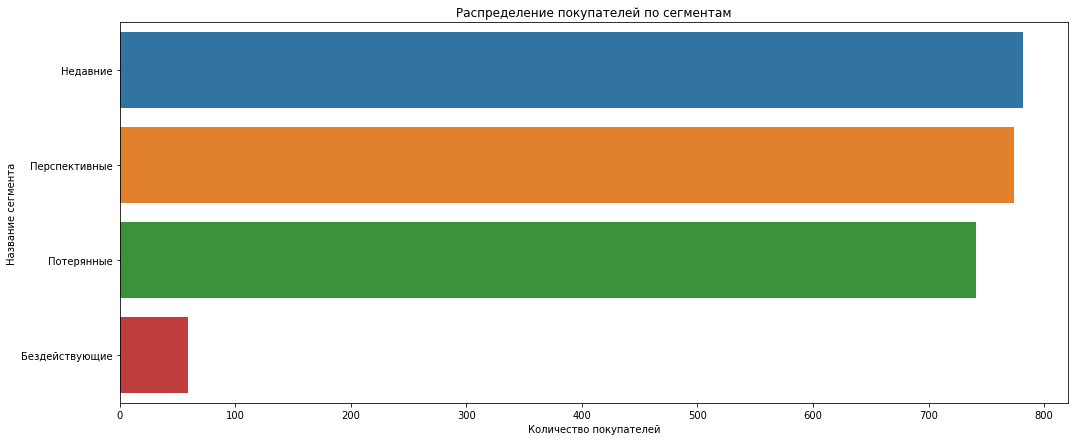

In [45]:
# Построение графика
plt.figure(figsize=(17, 7))

ax = sb.color_palette("turbo", as_cmap=True)
ax = sb.barplot(y='Segment', x='count_customer', data=segments)

ax.set_title('Распределение покупателей по сегментам')
ax.set_xlabel('Количество покупателей') 
ax.set_ylabel('Название сегмента') 
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

В результате сегментации получилось 4 группы, численность трёх из которых примерно равны. Наиболее привлекательными клиентами являются покупатели из сегментов `Недавние` и `Песпективные`.
    
Далее опишу полученные сегменты с помощью средних значений:

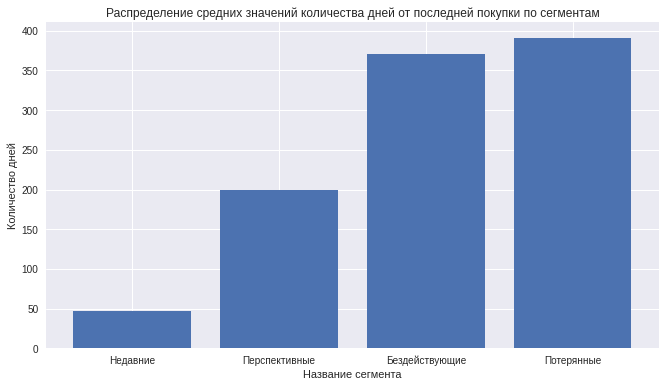

In [46]:
# Группировка данных
recency_group = rfm_df.groupby('Segment')['Recency'].mean().reset_index().sort_values('Recency')
# Построение графика
with plt.style.context('seaborn'):
    plt.figure(figsize=(11,6))
    plt.bar(recency_group['Segment'], recency_group['Recency'])
    plt.title('Распределение средних значений количества дней от последней покупки по сегментам')
    plt.xlabel('Название сегмента')
    plt.ylabel('Количество дней')
    plt.show()

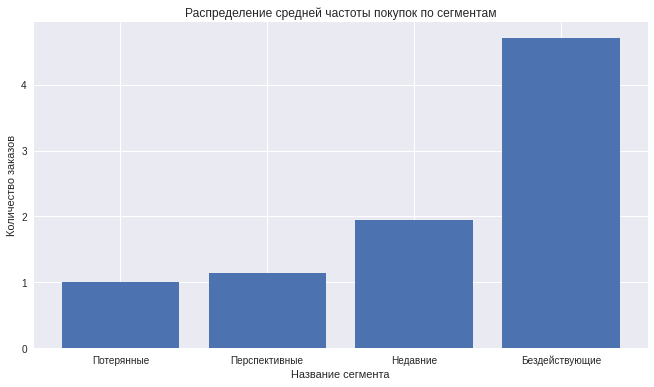

In [47]:
# Группировка данных
frequency_group = rfm_df.groupby('Segment')['Frequency'].mean().reset_index().sort_values('Frequency')
# Построение графика
with plt.style.context('seaborn'):
    plt.figure(figsize=(11,6))
    plt.bar(frequency_group['Segment'], frequency_group['Frequency'])
    plt.title('Распределение средней частоты покупок по сегментам')
    plt.xlabel('Название сегмента')
    plt.ylabel('Количество заказов')
    plt.show()

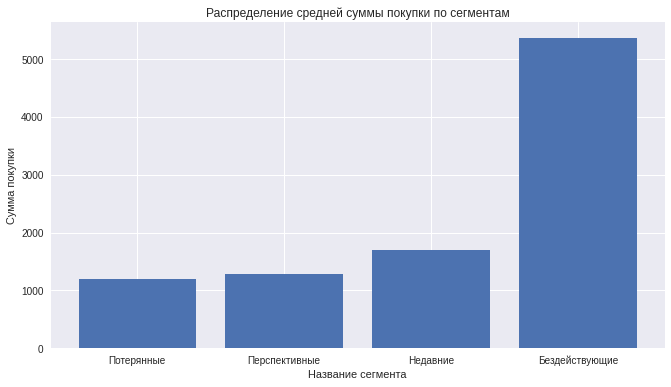

In [48]:
# Группировка данных
monetary_group = rfm_df.groupby('Segment')['Monetary'].mean().reset_index().sort_values('Monetary')
# Построение графика
with plt.style.context('seaborn'):
    plt.figure(figsize=(11,6))
    plt.bar(monetary_group['Segment'], monetary_group['Monetary'])
    plt.title('Распределение средней суммы покупки по сегментам')
    plt.xlabel('Название сегмента')
    plt.ylabel('Сумма покупки')
    plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

По последним графикам видно, что покупатели из сегмента `Бездействующие` имеют самые высокие средние показатели суммы покупок и частоты заказов, что косвенно свидетельствует о большом оттоке старых крупных клиентов.

## Проверка гипотез

### Средние чеки сегментов одинаковые

Н0: Различий в среднем чеке между двумя сегментами нет.

Н1: Различия в среднем чеке между двумя сегментов есть.

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Перед применением теста для проверки статистической значимости, необходимо проверить нормальность распределения средних значений получившихся сегментов.

In [49]:
# Объявление функции для проверки нормальности распределений
"""
Функция принимает набор данных и проверяет нормальность его распределения тестом Шапиро-Уилка 
"""
def check_normal(dataset):
    alpha = 0.05  # критический уровень статистической значимости

    results = st.shapiro(dataset)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

In [50]:
# Создание цикла для проверки нормальности распределений всех сегментов покупателей 
for segments in rfm_df['Segment'].unique():
    check_normal(rfm_df[rfm_df['Segment'] == segments]['Monetary'])

p-значение:  2.310601037825191e-41
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  1.1159419686854114e-38
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  4.7158345187016144e-35
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  5.000682938451192e-16
Отвергаем нулевую гипотезу: распределение не нормально


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Так как все проверенные распределения оказались ненормальны, для проверки статистической разницы будет использоваться непараметрический тест Уилкоксона-Манна-Уитни.

In [51]:
# Объявлении функции для проверки различий между двумя независимыми выборками

def test_mannwhitneyu(first_dataset, second_dataset, n, alpha):

    alpha_corr = alpha / n # поправка Бонферрони

    results = st.mannwhitneyu(first_dataset, second_dataset)

    print('p-значение: ', results.pvalue)

    if results.pvalue < alpha_corr:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
        ) 

In [52]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Недавние']['Monetary'],
                  rfm_df[rfm_df['Segment'] == 'Перспективные']['Monetary'],
                  6, 0.05)

p-значение:  4.1363776422860105e-13
Отвергаем нулевую гипотезу: разница статистически значима


In [53]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Недавние']['Monetary'],
                  rfm_df[rfm_df['Segment'] == 'Потерянные']['Monetary'],
                  6, 0.05)

p-значение:  8.856977655658159e-11
Отвергаем нулевую гипотезу: разница статистически значима


In [54]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Недавние']['Monetary'],
                  rfm_df[rfm_df['Segment'] == 'Бездействующие']['Monetary'],
                  6, 0.05)

p-значение:  0.974062649560349
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [55]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Перспективные']['Monetary'],
                  rfm_df[rfm_df['Segment'] == 'Потерянные']['Monetary'],
                  6, 0.05)

p-значение:  0.2916726466069922
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [56]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Перспективные']['Monetary'],
                  rfm_df[rfm_df['Segment'] == 'Бездействующие']['Monetary'],
                  6, 0.05)

p-значение:  0.00736618318477877
Отвергаем нулевую гипотезу: разница статистически значима


In [57]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Потерянные']['Monetary'],
                  rfm_df[rfm_df['Segment'] == 'Бездействующие']['Monetary'],
                  6, 0.05)

p-значение:  0.02058346896614504
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


### Средняя частота покупок сегментов одинаковые

Н0: Различий в средней частоте покупок между двумя сегментами нет.
    
Н1: Различия в средней частоте покупок между двумя сегментами есть.

In [58]:
# Создание цикла для проверки нормальности распределений всех сегментов покупателей 
for segments in rfm_df['Segment'].unique():
    check_normal(rfm_df[rfm_df['Segment'] == segments]['Frequency'])

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу, всё нормально
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  1.1394972773756532e-16
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [59]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Недавние']['Frequency'],
                  rfm_df[rfm_df['Segment'] == 'Перспективные']['Frequency'],
                  6, 0.05)

p-значение:  3.872234415863826e-211
Отвергаем нулевую гипотезу: разница статистически значима


In [60]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Недавние']['Frequency'],
                  rfm_df[rfm_df['Segment'] == 'Потерянные']['Frequency'],
                  6, 0.05)

p-значение:  3.0570944439354037e-285
Отвергаем нулевую гипотезу: разница статистически значима


In [61]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Недавние']['Frequency'],
                  rfm_df[rfm_df['Segment'] == 'Бездействующие']['Frequency'],
                  6, 0.05)

p-значение:  6.687822663493302e-09
Отвергаем нулевую гипотезу: разница статистически значима


In [62]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Перспективные']['Frequency'],
                  rfm_df[rfm_df['Segment'] == 'Потерянные']['Frequency'],
                  6, 0.05)

p-значение:  5.759820901379368e-21
Отвергаем нулевую гипотезу: разница статистически значима


In [63]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Перспективные']['Frequency'],
                  rfm_df[rfm_df['Segment'] == 'Бездействующие']['Frequency'],
                  6, 0.05)

p-значение:  1.233029120477393e-65
Отвергаем нулевую гипотезу: разница статистически значима


In [64]:
test_mannwhitneyu(rfm_df[rfm_df['Segment'] == 'Потерянные']['Frequency'],
                  rfm_df[rfm_df['Segment'] == 'Бездействующие']['Frequency'],
                  6, 0.05)

p-значение:  1.2297741412674786e-175
Отвергаем нулевую гипотезу: разница статистически значима


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Так как проверка одной из гипотез показала статистически значимую разницу между сегментами, значит сегментирование проведено успешно.

## Исследование сегментов на популярные категории и их сезонность

In [65]:
# Создание нового датафрейма со всей собранной в ходе исследования информацией 
data_full = pd.merge(data, rfm_df, on='customer_id')
data_full.head(5)

,date,customer_id,order_id,product,quantity,price,month,weekday_order,price_amount,category,order_hour,days_after_last_order,Recency,Frequency,Monetary,R,F,M,RFM,Segment
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,0,142.0,"Цветы, растения",0,488,488,1,1037.0,1,1,2,112,Потерянные
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,0,194.0,"Цветы, растения",0,488,488,1,1037.0,1,1,2,112,Потерянные
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,0,112.0,"Цветы, растения",0,488,488,1,1037.0,1,1,2,112,Потерянные
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,0,179.0,"Цветы, растения",0,488,488,1,1037.0,1,1,2,112,Потерянные
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,0,112.0,"Цветы, растения",0,488,488,1,1037.0,1,1,2,112,Потерянные


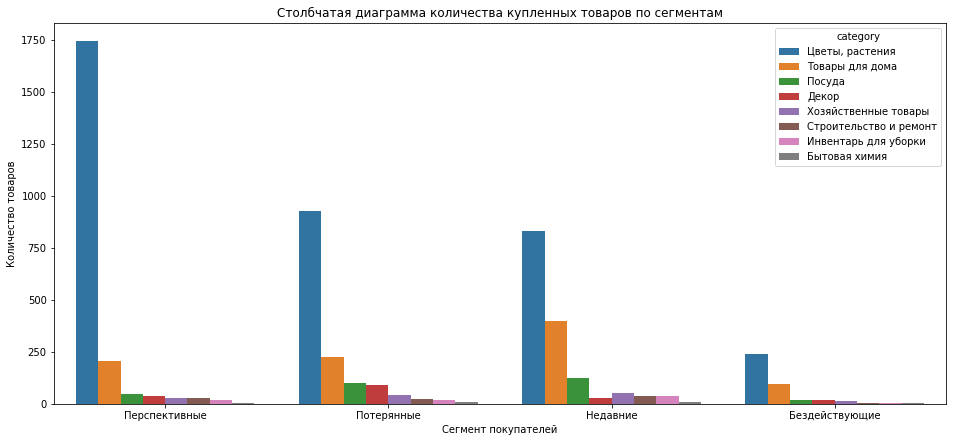

In [66]:
# Группировка данных
dfbar_product = (data_full.groupby(['Segment', 'category']).
              agg({'product': 'count'}).
              reset_index().
              sort_values(by='product', ascending=False)
             )

# Построение столбчатой диаграммы 
plt.figure(figsize=(16, 7))
sb.barplot(y='product', x='Segment', hue='category', data=dfbar_product)
plt.title('Столбчатая диаграмма количества купленных товаров по сегментам')
plt.ylabel('Количество товаров')
plt.xlabel('Сегмент покупателей')
plt.show()

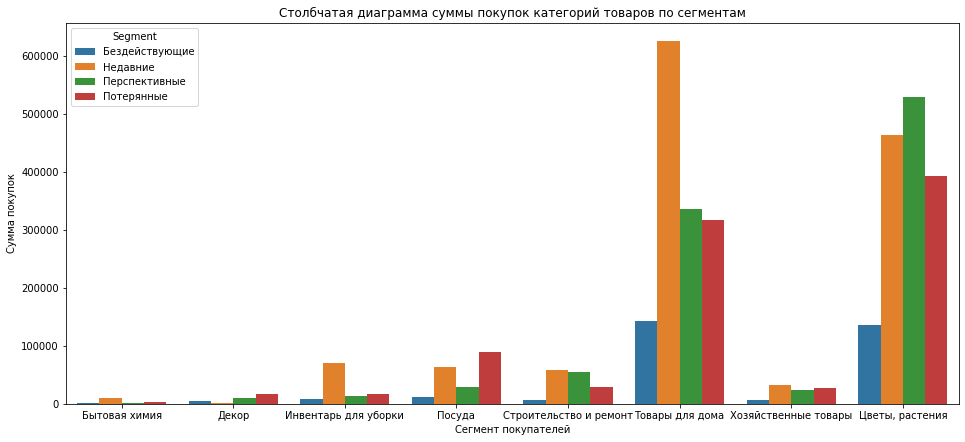

In [67]:
# Группировка данных
dfbar_sum = data_full.groupby(['Segment', 'category']).agg({'price_amount': 'sum'}).reset_index()

# Построение столбчатой диаграммы 
plt.figure(figsize=(16, 7))
sb.barplot(y='price_amount', x='category', hue='Segment', data=dfbar_sum)
plt.title('Столбчатая диаграмма суммы покупок категорий товаров по сегментам')
plt.ylabel('Сумма покупок')
plt.xlabel('Сегмент покупателей')
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Для рассмотрения сезонности построю столбчатые диаграммы товарных категорий по сегментам покупателей:

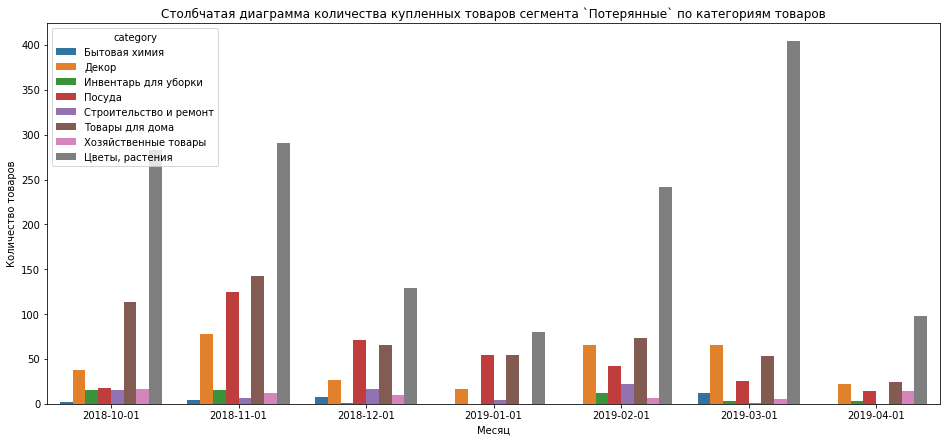

In [68]:
dfbar_lost = (data_full[data_full['Segment'] == 'Потерянные']
                  .groupby([ 'month', 'category'])
                  .agg({'quantity': 'sum'})
                  .reset_index())

# Построение столбчатой диаграммы 
plt.figure(figsize=(16, 7))
sb.barplot(y='quantity', x='month', hue='category', data=dfbar_lost)
plt.title('Столбчатая диаграмма количества купленных товаров сегмента `Потерянные` по категориям товаров')
plt.ylabel('Количество товаров')
plt.xlabel('Месяц')
plt.show()

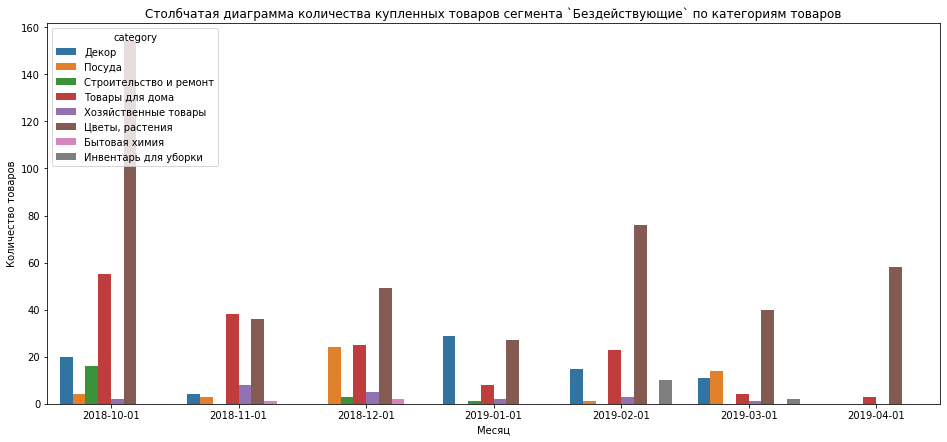

In [69]:
dfbar_sleep = (data_full[data_full['Segment'] == 'Бездействующие']
                  .groupby([ 'month', 'category'])
                  .agg({'quantity': 'sum'})
                  .reset_index())

# Построение столбчатой диаграммы 
plt.figure(figsize=(16, 7))
sb.barplot(y='quantity', x='month', hue='category', data=dfbar_sleep)
plt.title('Столбчатая диаграмма количества купленных товаров сегмента `Бездействующие` по категориям товаров')
plt.ylabel('Количество товаров')
plt.xlabel('Месяц')
plt.show()

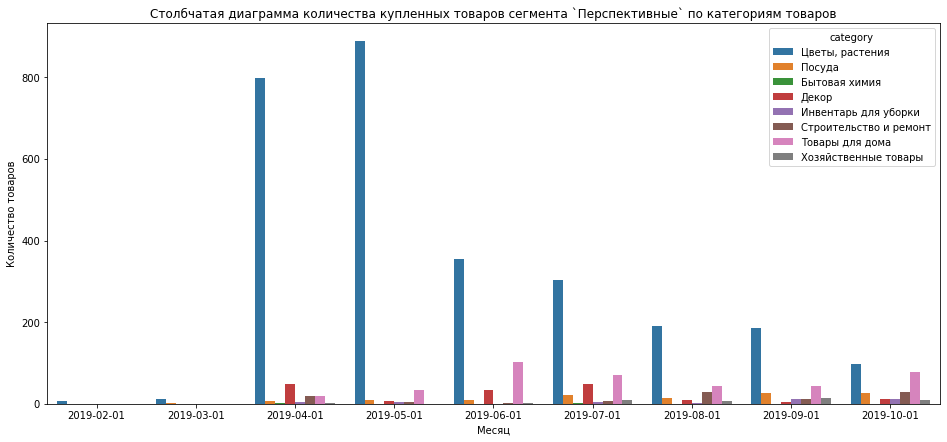

In [70]:
dfbar_promising = (data_full[data_full['Segment'] == 'Перспективные']
                  .groupby([ 'month', 'category'])
                  .agg({'quantity': 'sum'})
                  .reset_index())

# Построение столбчатой диаграммы 
plt.figure(figsize=(16, 7))
sb.barplot(y='quantity', x='month', hue='category', data=dfbar_promising)
plt.title('Столбчатая диаграмма количества купленных товаров сегмента `Перспективные` по категориям товаров')
plt.ylabel('Количество товаров')
plt.xlabel('Месяц')
plt.show()

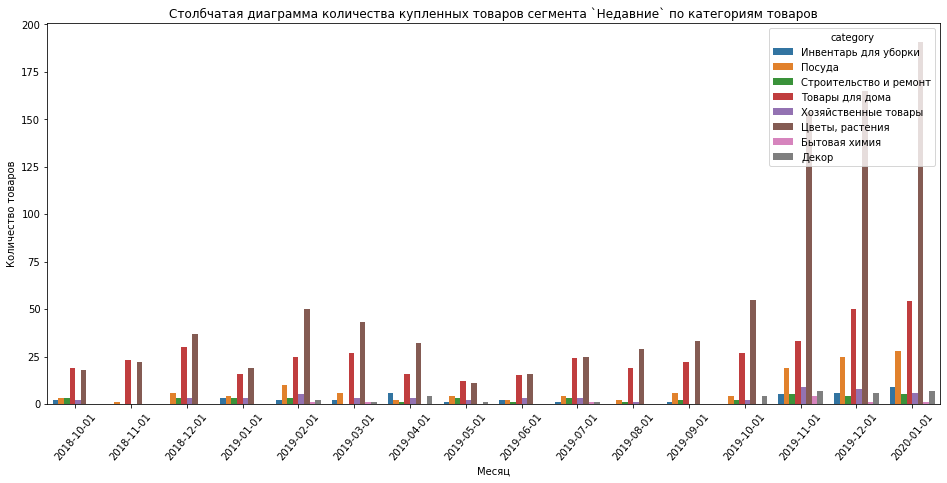

In [71]:
dfbar_recent = (data_full[data_full['Segment'] == 'Недавние']
                  .groupby([ 'month', 'category'])
                  .agg({'quantity': 'sum'})
                  .reset_index())

# Построение столбчатой диаграммы 
plt.figure(figsize=(16, 7))
sb.barplot(y='quantity', x='month', hue='category', data=dfbar_recent)
plt.title('Столбчатая диаграмма количества купленных товаров сегмента `Недавние` по категориям товаров')
plt.ylabel('Количество товаров')
plt.xlabel('Месяц')
plt.xticks(rotation=50)
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Сезонность продаж наблюдается практически во всех рассматриваемых кластерах.
    
У `Перспективного` кластера сезон начинается в апреле. Видимо, это связанно с подготовкой к дачному сезону. Спрос резко повышается (апрель) и спадает к концу дачного сезона (сентябрь).

`Недавние` покупатели имеют повышенный спрос на товары последние 3 месяца наблюдений.
    
`Бездействующие` были наиболее активны в октябре 2018 года, а `Потерянные` в марте 2019 года.

## Выводы и рекомендации

**Выводы:**

В ходе проекта был проанализирован профиль потребления покупателей магазина «Пока все ещё тут» с помощью датасета, который описывает транзакции этого интернет-магазина. Были определена популярность и сезонность товаров для покупателей разных сегментов.

На этапе предобработки данные были проверены на пропуски, явные дубликаты и соответствие типов данных. Обнаружено и удалено 1864 строчки-дубликата, что составило 24,9 % от всего датафрейма. Также исследованы неявные дубликаты и номера заказов, повторяющиеся у нескольких покупателей. После нахождения аномальных значений, они были удалены из датафрейма.

При исследовании данных было определено, что:
* Период исследования составляет 487 дней (с 1 октября 2018 года по 31 января 2020 года);
* Всего в очищенном датафрейме содержится информация о 2356 уникальных пользователях и 3426 уникальных заказах;
* Максимальное число заказов было оформлено в феврале 2019 года, тогда как самым неудачным по числу заказов оказался июнь 2019 года;
* Меньше всего заказов совершается в выходные дни и в утренние, ночные часы;
* Пик покупательской активности приходится на начало недели и полуденное время;
* Процентное соотношение показало, что среди ассортимента преобладают товары из категории `Цветы, растения` (62%) и они же имеют наибольшую сумму покупок (36%).

С помощью RFM-анализа покупатели были разделены на 4 сегмента: `Недавние`, `Перспективные`, `Бездействующие` и `Потерянные`. Как следует из названия, самыми подходящими для дальнейшего исследования стали 2 сегмента: `Недавние` и `Перспективные`.

В результате проверок гипотез о равенстве средних чеков и средней частоты покупок была определена статистически значимая разница между сегментами, что свидетельствует о корректной сегментации покупателей.


**Рекомендации:**
* Сегмент `Потерянные`: 
    * Количество уникальных пользователей - 741;
    * Средний чек этого кластера составляет - 1202; 
    * Среднее количество заказов ~ 1;
    * Среднее количество дней от покупки - 391;
    * Топ категорий товаров - `Цветы, растения`;
    Кластер с самым большим средним количеством дней от последней покупки. Не являются постоянными покупателями. Рекомендуется сделать рассылку с опросом покупателей на тему того, что им не понравилось/хотелось бы улучшить. Повышения качества услуг и товаров из результатов опросов могут увеличить потенциальную возвращаемость покупателей. 

 
* Сегмент `Бездействующие`: 
    * Самый малочисленный сегмент - всего 59 уникальных покупателей;
    * Средний чек этого кластера составляет - 5368, что является первым результатом; 
    * Среднее количество заказов ~ 5;
    * Среднее количество дней от покупки - 371;
    * Топ категорий товаров - `Цветы, растения` и `Товары для дома`;
    
    Обладает самым большим средним чеком и количеством заказов, что говорит о "оптовости" покупателей из этого кластера. Генерируют большое количество выручки, но давно не совершали покупок в интернет-магазине. Необходима рассылка персональных предложений со скидкой на товары из категорий `Цветы, растения` и `Товары для дома`. Выраженная сезонность не обнаружена.
    

* Сегмент `Перспективные`: 
    * Количество уникальных пользователей - 774;
    * Средний чек этого кластера составляет - 1289, что является последним результатом; 
    * Среднее количество заказов ~ 1;
    * Среднее количество дней от покупки - 200;
    * Топ категорий товаров - `Цветы, растения`;
 
     Данный кластер обладает самым низким средним чеком, но при этом большое количество покупателей, совершивших 1 заказ, относительно недавно. Являются точкой роста. Предполагаю необходимость отправки персонального предложения со скидкой на второй заказ товаров из категории `Цветы, растения`. Рассылку совершать лучше в начале лета (май-июнь).
     
 
* Сегмент `Недавние`: 
    * Самый многочисленный сегмент - 782 уникальных пользователя;
    * Средний чек этого кластера составляет - 1692; 
    * Среднее количество заказов ~ 2;
    * Среднее количество дней от покупки - 48;
    * Топ категорий товаров - `Товары для дома`;
    Новые клиенты, которые совершили в среднем по 2 заказа с неплохим средним чеком. Больше всех пользуются спросом `Товары для дома`, но и другие основные категории тоже не остаются без внимания. Уменьшение средней суммы покупок этого сегмента говорит о небольшом падении спроса, поэтому одним из вариантов повышения возвращаемости и увеличения количества продаваемого товара будет рассылка с товарами из всех популярных категорий. Выраженная сезонность не обнаружена.

Примечание - Все рассылки предложений лучше совершать в начале недели и в полдень/первой половине дня, в это время совершается наибольшее число заказов.

Ссылка на презентацию: https://disk.yandex.ru/d/ct4rkG3z45f6KA